# Exploratory Data Analysis (EDA)

## Objectives:

1. Sample and feature descriptions
2. Identify data shape, distribution, and spread
3. correlation
4. Discover outliers


In [60]:
# Load Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load Dataset
data = pd.read_csv('kickstarter_projects.csv')
df = pd.DataFrame(data = data)
df.round(decimals=0)
# Quick look into kickstarter_projects columns
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


## Description of columns (provided by datasource)

1. ID: Internal kickstarter id
2.  Name: Name of the project
3. Category: Project category
4. Subcategory: Project subcategory
5. Country: Country the project is from
6. Launched: Date the project was launched
7. Deadline: Deadline date for crowdfunding
8. Goal: Amount of money the creator needs to complete the project (USD)
9. Pledged: Amount of money pledged by the crowd (USD)
10. Backers: Number of backers
11. State: Current condition the project is in (as of 2018-01-02)

In [61]:
# Understanding 'State' of projects
# replace 'Failed' with 0 & 'Successful' with 1
df.State = df.State.replace({'Failed':0 ,
                             'Successful': 1})
df = df[df["State"] != 'Live']
df = df[df["State"] != 'Canceled']
df = df[df["State"] != 'Suspended']

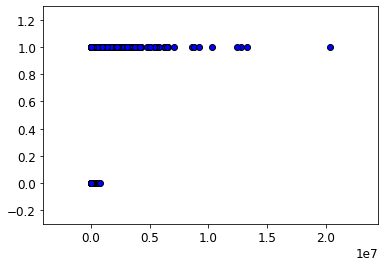

In [62]:
df['State'].astype(int)
y = df['State']
x = df['Pledged']
plt.margins(.2,.3)
scat = plt.scatter(x = x, y = y, c = 'Blue', edgecolors='black')

#### Aggregation Statistics

In [63]:
# Create separate dataframes
Failed = df[df["State"] != 1]
Success = df[df["State"] != 0]

display('Failure Aggragation')
display(Failed.agg(
    {
        "Goal": ['mean',"max"],
        "Pledged": ['mean',"max"],
        "Backers" :['mean',"max"],
    }
).round())
display('Success Aggragation')
display(Success.agg(
    {
        "Goal": ['mean',"max"],
        "Pledged": ['mean',"max"],
        "Backers" :['mean',"max"],
    }
).round())

'Failure Aggragation'

,Goal,Pledged,Backers
mean,63189.0,1321.0,16.0
max,166361391.0,757353.0,6550.0


'Success Aggragation'

,Goal,Pledged,Backers
mean,9536.0,22664.0,264.0
max,2015609.0,20338986.0,219382.0


#### 'Pledged' and 'Backers' both contain a correlation between the success of a project. Failed projects had significantly less number of pledgers and backers compared to successful projects

#### Surprisingly, successful projects had a mean goal much less than failed projects. This may be due to Initial investors viewing a lower goal as less risk, attracting to more a broader view of potential investors. A smaller investing amount with be more impactful, than the same amount with a larger reach goal.

#### Deploy Logistic Regression model to predict potential success of a kickstarted project

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

y_data = df['State'].astype('int')
x_data = df[['Pledged', 'Backers']]

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.4)

#Create and Train model
model = LogisticRegression()
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85     79307
           1       0.86      0.59      0.70     53278

    accuracy                           0.80    132585
   macro avg       0.82      0.76      0.77    132585
weighted avg       0.81      0.80      0.79    132585



In [71]:
# Training & Testing datasets to csv
x_training_data.to_csv('x_training_data')
x_test_data.to_csv('x_test_data')
y_training_data.to_csv('y_training_data')
y_test_data.to_csv('y_test_data')

#### Predict Proba method to unveil probability, in array form (both classes)

In [65]:
y_pred_prob = model.predict_proba(x_test_data)[0:10]
y_pred_prob

array([[0.78074328, 0.21925672],
       [0.79641096, 0.20358904],
       [0.46476681, 0.53523319],
       [0.58759144, 0.41240856],
       [0.78959595, 0.21040405],
       [0.7617651 , 0.2382349 ],
       [0.80983969, 0.19016031],
       [0.81380619, 0.18619381],
       [0.43016949, 0.56983051],
       [0.71806013, 0.28193987]])

#### Implement confusing matrix:

<AxesSubplot:>

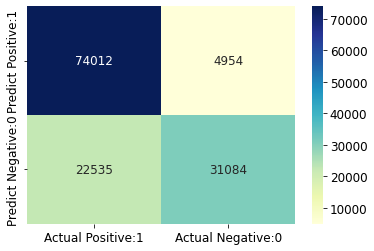

In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_data, predictions)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
                                

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

#### Confusion Matrix results:

1. True positives - 73966
2. True Negatives - 31266
3. False Positives - 5123
4. False Negatives - 22230

Text(0, 0.5, 'Frequency')

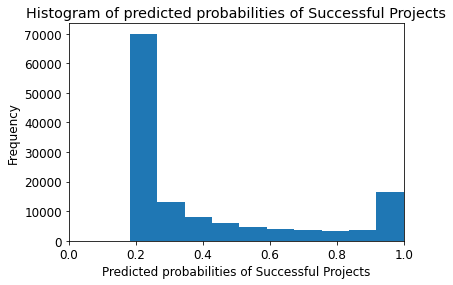

In [67]:
y_pred = model.predict_proba(x_test_data)[:, 1]
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Successful Projects')


# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of Successful Projects')
plt.ylabel('Frequency')

#### There is an extreme amount of observations that have a probability of 0.2 to succeed. The histogram is skewed until p => 0.9. While majority of observations predict that a project will not be successful, there is a spike in successful projects.